# Online Shopper Intensions

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
odf=pd.read_csv('online_shoppers_intention.csv')
odf.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print("Number of rows:",odf.shape[0])
print("Number of columns:",odf.shape[1])

Number of rows: 12330
Number of columns: 18


In [4]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Categorical : Month, VisitorType
Boolean : Weekend, Revenue

In [5]:
odf.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   
odf['Revenue_encoded']=le.fit_transform(odf['Revenue'])
odf.drop('Revenue',axis=1,inplace=True)
odf['Month_encoded']=le.fit_transform(odf['Month'])
odf.drop('Month',axis=1,inplace=True)
odf['VisitorType_encoded']=le.fit_transform(odf['VisitorType'])
odf.drop('VisitorType',axis=1,inplace=True)
odf['Weekend_encoded']=le.fit_transform(odf['Weekend'])
odf.drop('Weekend',axis=1,inplace=True)

#### Dropping Informational_Duration as it has 80% 0 value so the model is getting biased, also it is correlated with Informational feature

In [7]:
odf.drop('Informational_Duration',axis=1,inplace=True)

#### Clubbing row values of Informational as it has 78% 0 value

In [8]:
odf['Informational']=odf['Informational'].where(odf['Informational']<3.0,np.nan)

In [9]:
odf['Informational'].value_counts(normalize=True)*100

0.0    84.574468
1.0     9.077433
2.0     6.348099
Name: Informational, dtype: float64

In [10]:
odf['Informational'].fillna(3,inplace=True)

#### Clubbing row values of PageValues as it has maximum 0 value

In [11]:
odf['PageValues']=odf['PageValues'].where(odf['PageValues']<35.0,np.nan)

In [12]:
odf['PageValues'].fillna(4,inplace=True)

In [13]:
odf['PageValues']=odf['PageValues'].where(odf['PageValues']<15.0,np.nan)

In [14]:
odf['PageValues'].fillna(3,inplace=True)

In [15]:
odf['PageValues']=odf['PageValues'].where(odf['PageValues']<7.0,np.nan)

In [16]:
odf['PageValues'].fillna(2,inplace=True)

In [17]:
odf['PageValues']=odf['PageValues'].where((odf['PageValues']==0.0)|(odf['PageValues']==4.0)|(odf['PageValues']==2.0)|(odf['PageValues']==3.0),np.nan)

In [18]:
odf['PageValues'].fillna(1,inplace=True)

In [19]:
odf['PageValues'].value_counts(normalize=True)*100

0.0    77.858881
3.0     6.269262
4.0     5.490673
1.0     5.377129
2.0     5.004055
Name: PageValues, dtype: float64

#### checking null values

In [20]:
odf.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Revenue_encoded            0
Month_encoded              0
VisitorType_encoded        0
Weekend_encoded            0
dtype: int64

#### checking outliers

Administrative                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Administrative_Duration    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Informational               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
ProductRelated             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
ProductRelated_Duration    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
BounceRates                   AxesSubplot(0.125,0.593621;0.133621x0.130172)
ExitRates                  AxesSubplot(0.285345,0.593621;0.133621x0.130172)
PageValues                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SpecialDay                 AxesSubplot(0.606034,0.593621;0.133621x0.130172)
OperatingSystems           AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Browser                       AxesSubplot(0.125,0.437414;0.133621x0.130172)
Region                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
TrafficType                 AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Revenue_enco

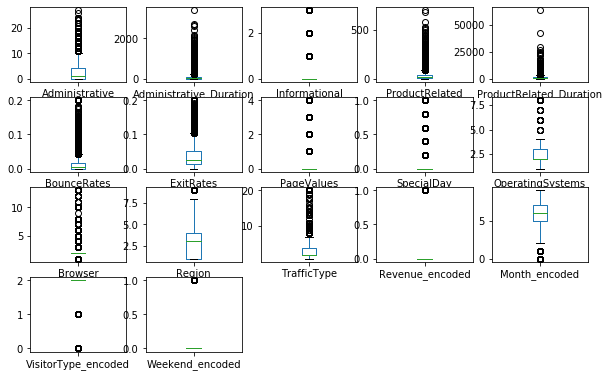

In [21]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

#### Treating outliers

In [22]:
# Administrative
q1_a=np.quantile(odf['Administrative'],q=0.25)
q2_a=np.quantile(odf['Administrative'],q=0.50)
q3_a=np.quantile(odf['Administrative'],q=0.75)
iqr_a=q3_a-q1_a
ll_a=q1_a-(1.5*iqr_a)
ul_a=q3_a+(1.5*iqr_a)

# Administrative_Duration
q1_ad=np.quantile(odf['Administrative_Duration'],q=0.25)
q2_ad=np.quantile(odf['Administrative_Duration'],q=0.50)
q3_ad=np.quantile(odf['Administrative_Duration'],q=0.75)
iqr_ad=q3_ad-q1_ad
ll_ad=q1_ad-(1.5*iqr_ad)
ul_ad=q3_ad+(1.5*iqr_ad)

# Informational

q1_i=np.quantile(odf['Informational'],q=0.25)
q2_i=np.quantile(odf['Informational'],q=0.50)
q3_i=np.quantile(odf['Informational'],q=0.75)
iqr_i=q3_i-q1_i
ll_i=q1_i-(1.5*iqr_i)
ul_i=q3_i+(1.5*iqr_i)

# ProductRelated 
q1_t=np.quantile(odf['ProductRelated'],q=0.25)
q2_t=np.quantile(odf['ProductRelated'],q=0.50)
q3_t=np.quantile(odf['ProductRelated'],q=0.75)
iqr_t=q3_t-q1_t
ll_t=q1_t-(1.5*iqr_t)
ul_t=q3_t+(1.5*iqr_t)

# ProductRelated_Duration
q1_pd=np.quantile(odf['ProductRelated_Duration'],q=0.25)
q2_pd=np.quantile(odf['ProductRelated_Duration'],q=0.50)
q3_pd=np.quantile(odf['ProductRelated_Duration'],q=0.75)
iqr_pd=q3_pd-q1_pd
ll_pd=q1_pd-(1.5*iqr_pd)
ul_pd=q3_pd+(1.5*iqr_pd)

# BounceRates
q1_b=np.quantile(odf['BounceRates'],q=0.25)
q2_b=np.quantile(odf['BounceRates'],q=0.50)
q3_b=np.quantile(odf['BounceRates'],q=0.75)
iqr_b=q3_b-q1_b
ll_b=q1_b-(1.5*iqr_b)
ul_b=q3_b+(1.5*iqr_b)

# ExitRates
q1_e=np.quantile(odf['ExitRates'],q=0.25)
q2_e=np.quantile(odf['ExitRates'],q=0.50)
q3_e=np.quantile(odf['ExitRates'],q=0.75)
iqr_e=q3_e-q1_e
ll_e=q1_e-(1.5*iqr_e)
ul_e=q3_e+(1.5*iqr_e)

# PageValues
q1_p=np.quantile(odf['PageValues'],q=0.25)
q2_p=np.quantile(odf['PageValues'],q=0.50)
q3_p=np.quantile(odf['PageValues'],q=0.75)
iqr_p=q3_p-q1_p
ll_p=q1_p-(1.5*iqr_p)
ul_p=q3_p+(1.5*iqr_p)

##### replacing outliers with null values

In [23]:
#odf['Administrative']=odf['Administrative'].where(odf['Administrative']<=ul_a,np.nan)
odf['Administrative_Duration']=odf['Administrative_Duration'].where(odf['Administrative_Duration']<=ul_ad,np.nan)
odf['ProductRelated']=odf['ProductRelated'].where(odf['ProductRelated']<=ul_t,np.nan)
odf['BounceRates']=odf['BounceRates'].where(odf['BounceRates']<=ul_b,np.nan)
odf['ExitRates']=odf['ExitRates'].where(odf['ExitRates']<=ul_e,np.nan)
odf['ProductRelated_Duration']=odf['ProductRelated_Duration'].where(odf['ProductRelated_Duration']<=ul_pd,np.nan)

In [24]:
odf.isnull().sum()

Administrative                0
Administrative_Duration    1172
Informational                 0
ProductRelated              987
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                    0
SpecialDay                    0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
Revenue_encoded               0
Month_encoded                 0
VisitorType_encoded           0
Weekend_encoded               0
dtype: int64

#### MICE for replacing above null values

In [25]:
pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [27]:
from impyute.imputation.cs import mice

# start the MICE training
#m=mice(odf)
odf[['Administrative','Administrative_Duration','Informational','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Revenue_encoded','Month_encoded','VisitorType_encoded','Weekend_encoded']]=mice(odf)

C:\Users\PRiyaranjan\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [28]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
Administrative             12330 non-null float64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null float64
ProductRelated             12330 non-null float64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
OperatingSystems           12330 non-null float64
Browser                    12330 non-null float64
Region                     12330 non-null float64
TrafficType                12330 non-null float64
Revenue_encoded            12330 non-null float64
Month_encoded              12330 non-null float64
VisitorType_encoded        12330 non-null float64
Weekend_encoded            12330 non-null float64
dtypes: float64(17)
memory usage: 1.6 MB


Administrative                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Administrative_Duration    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Informational               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
ProductRelated             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
ProductRelated_Duration    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
BounceRates                   AxesSubplot(0.125,0.593621;0.133621x0.130172)
ExitRates                  AxesSubplot(0.285345,0.593621;0.133621x0.130172)
PageValues                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SpecialDay                 AxesSubplot(0.606034,0.593621;0.133621x0.130172)
OperatingSystems           AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Browser                       AxesSubplot(0.125,0.437414;0.133621x0.130172)
Region                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
TrafficType                 AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Revenue_enco

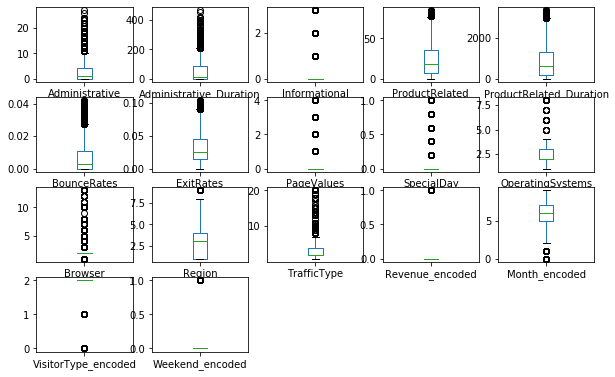

In [29]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

In [30]:
# Administrative
q1_a=np.quantile(odf['Administrative'],q=0.25)
q2_a=np.quantile(odf['Administrative'],q=0.50)
q3_a=np.quantile(odf['Administrative'],q=0.75)
iqr_a=q3_a-q1_a
ll_a=q1_a-(1.5*iqr_a)
ul_a=q3_a+(1.5*iqr_a)

# Administrative_Duration
q1_ad=np.quantile(odf['Administrative_Duration'],q=0.25)
q2_ad=np.quantile(odf['Administrative_Duration'],q=0.50)
q3_ad=np.quantile(odf['Administrative_Duration'],q=0.75)
iqr_ad=q3_ad-q1_ad
ll_ad=q1_ad-(1.5*iqr_ad)
ul_ad=q3_ad+(1.5*iqr_ad)

# Informational

q1_i=np.quantile(odf['Informational'],q=0.25)
q2_i=np.quantile(odf['Informational'],q=0.50)
q3_i=np.quantile(odf['Informational'],q=0.75)
iqr_i=q3_i-q1_i
ll_i=q1_i-(1.5*iqr_i)
ul_i=q3_i+(1.5*iqr_i)

# ProductRelated 
q1_t=np.quantile(odf['ProductRelated'],q=0.25)
q2_t=np.quantile(odf['ProductRelated'],q=0.50)
q3_t=np.quantile(odf['ProductRelated'],q=0.75)
iqr_t=q3_t-q1_t
ll_t=q1_t-(1.5*iqr_t)
ul_t=q3_t+(1.5*iqr_t)

# ProductRelated_Duration
q1_pd=np.quantile(odf['ProductRelated_Duration'],q=0.25)
q2_pd=np.quantile(odf['ProductRelated_Duration'],q=0.50)
q3_pd=np.quantile(odf['ProductRelated_Duration'],q=0.75)
iqr_pd=q3_pd-q1_pd
ll_pd=q1_pd-(1.5*iqr_pd)
ul_pd=q3_pd+(1.5*iqr_pd)

# BounceRates
q1_b=np.quantile(odf['BounceRates'],q=0.25)
q2_b=np.quantile(odf['BounceRates'],q=0.50)
q3_b=np.quantile(odf['BounceRates'],q=0.75)
iqr_b=q3_b-q1_b
ll_b=q1_b-(1.5*iqr_b)
ul_b=q3_b+(1.5*iqr_b)

# ExitRates
q1_e=np.quantile(odf['ExitRates'],q=0.25)
q2_e=np.quantile(odf['ExitRates'],q=0.50)
q3_e=np.quantile(odf['ExitRates'],q=0.75)
iqr_e=q3_e-q1_e
ll_e=q1_e-(1.5*iqr_e)
ul_e=q3_e+(1.5*iqr_e)

# PageValues
q1_p=np.quantile(odf['PageValues'],q=0.25)
q2_p=np.quantile(odf['PageValues'],q=0.50)
q3_p=np.quantile(odf['PageValues'],q=0.75)
iqr_p=q3_p-q1_p
ll_p=q1_p-(1.5*iqr_p)
ul_p=q3_p+(1.5*iqr_p)

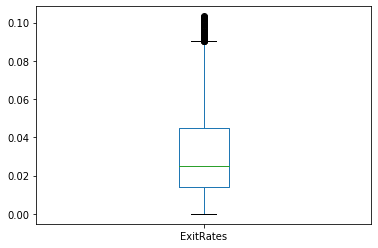

In [31]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [32]:
odf['Administrative']=odf['Administrative'].where(odf['Administrative']<=ul_a,odf['Administrative'].median())
odf['Administrative_Duration']=odf['Administrative_Duration'].where(odf['Administrative_Duration']<=ul_ad,odf['Administrative_Duration'].median())
odf['ProductRelated']=odf['ProductRelated'].where(odf['ProductRelated']<=ul_t,odf['ProductRelated'].median())
odf['BounceRates']=odf['BounceRates'].where(odf['BounceRates']<=ul_b,odf['BounceRates'].median())
odf['ExitRates']=odf['ExitRates'].where(odf['ExitRates']<=ul_e,odf['ExitRates'].median())
odf['ProductRelated_Duration']=odf['ProductRelated_Duration'].where(odf['ProductRelated_Duration']<=ul_pd,odf['ProductRelated_Duration'].median())

In [33]:
odf[odf['ExitRates']>ul_e]

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded


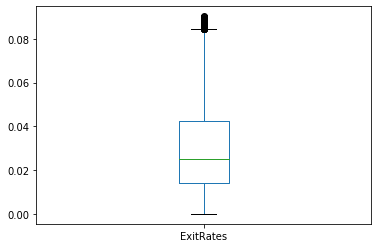

In [34]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [35]:
odf['OperatingSystems'].value_counts(normalize=True)*100

2.0    53.536091
1.0    20.965126
3.0    20.721817
4.0     3.876723
8.0     0.640714
6.0     0.154096
7.0     0.056772
5.0     0.048662
Name: OperatingSystems, dtype: float64

In [36]:
odf['Region'].value_counts(normalize=True)*100

1.0    38.767234
3.0    19.489051
4.0     9.586375
2.0     9.213301
6.0     6.528792
7.0     6.171938
9.0     4.144363
8.0     3.519870
5.0     2.579075
Name: Region, dtype: float64

In [37]:
odf['Browser'].value_counts(normalize=True)*100

2.0     64.566099
1.0     19.967559
4.0      5.969181
5.0      3.787510
6.0      1.411192
10.0     1.321979
8.0      1.094891
3.0      0.851582
13.0     0.494728
7.0      0.397405
12.0     0.081103
11.0     0.048662
9.0      0.008110
Name: Browser, dtype: float64

In [38]:
odf['TrafficType'].value_counts(normalize=True)*100

2.0     31.735604
1.0     19.878345
3.0     16.642336
4.0      8.669911
13.0     5.985401
10.0     3.649635
6.0      3.600973
8.0      2.781833
5.0      2.108678
11.0     2.003244
20.0     1.605839
9.0      0.340633
7.0      0.324412
15.0     0.308191
19.0     0.137875
14.0     0.105434
18.0     0.081103
16.0     0.024331
17.0     0.008110
12.0     0.008110
Name: TrafficType, dtype: float64

## EDA

### Univariate Analysis

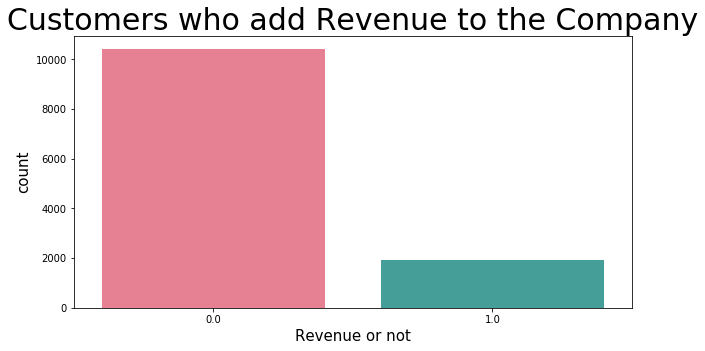

In [39]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Revenue_encoded'], palette = 'husl')
plt.title('Customers who add Revenue to the Company', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

#### Weekend

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Weekend_encoded'], palette = 'husl')
plt.title('Weekend or not', fontsize = 30)
plt.xlabel('weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

NameError: name 'X' is not defined

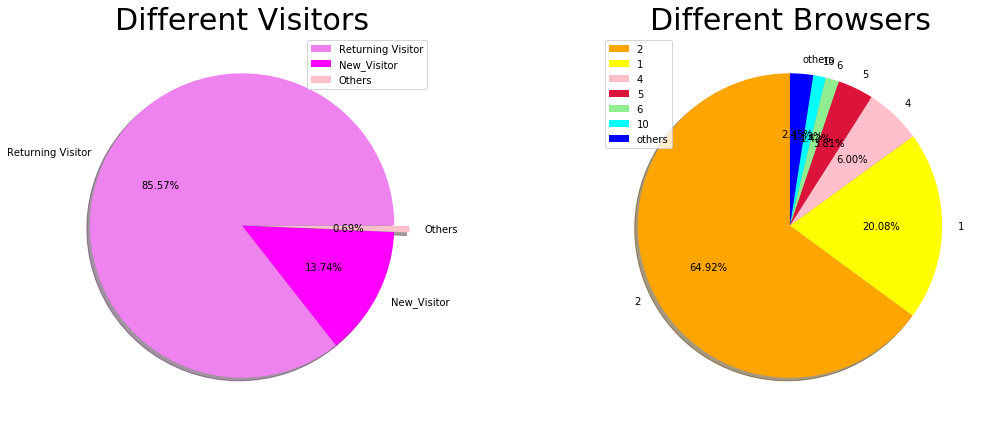

In [41]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

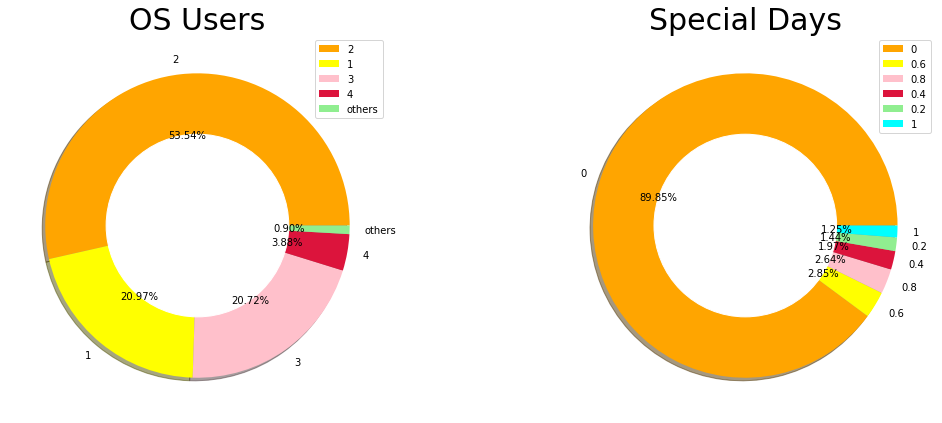

In [42]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OS Users', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson','lightgreen', 'cyan']
explode = [0, 0, 0, 0, 0, 0]
labels = "0", "0.6","0.8","0.4","0.2","1"

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(odf['SpecialDay'].value_counts(), colors = colors, labels = labels,explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

In [43]:
odf['OperatingSystems'].value_counts()

2.0    6601
1.0    2585
3.0    2555
4.0     478
8.0      79
6.0      19
7.0       7
5.0       6
Name: OperatingSystems, dtype: int64

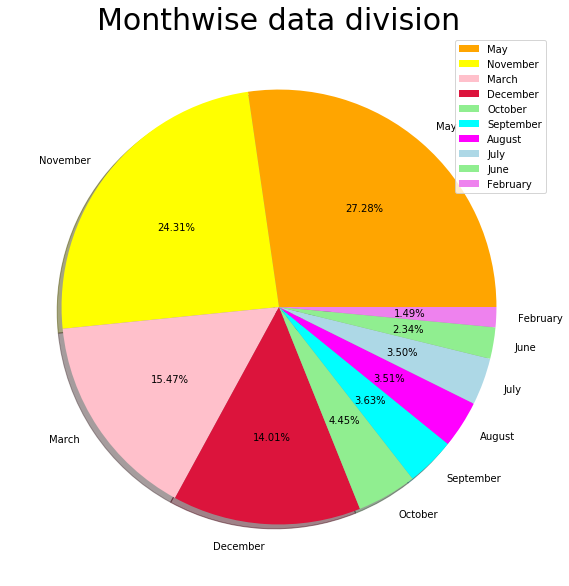

In [44]:
#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(odf['Month_encoded'].value_counts(), colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Monthwise data division', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

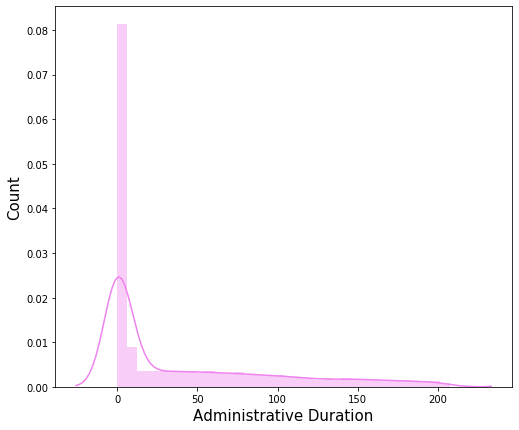

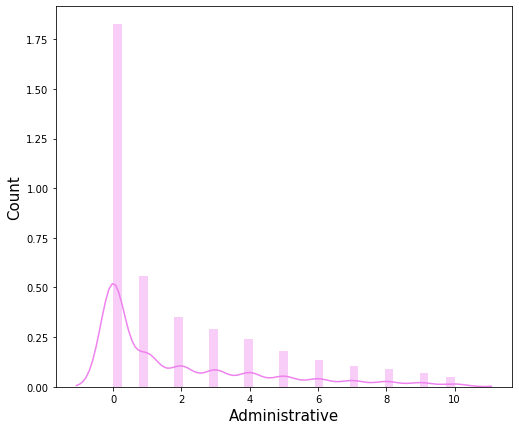

In [45]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['Administrative_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['Administrative'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

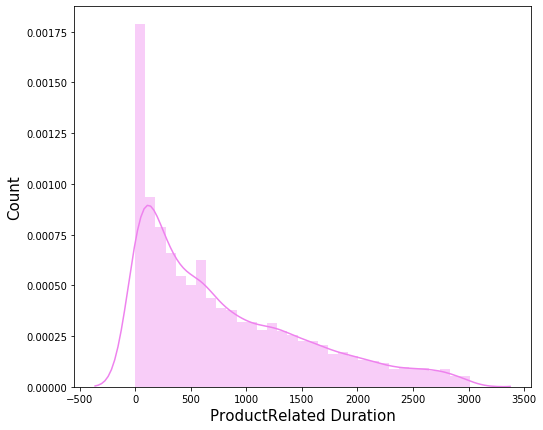

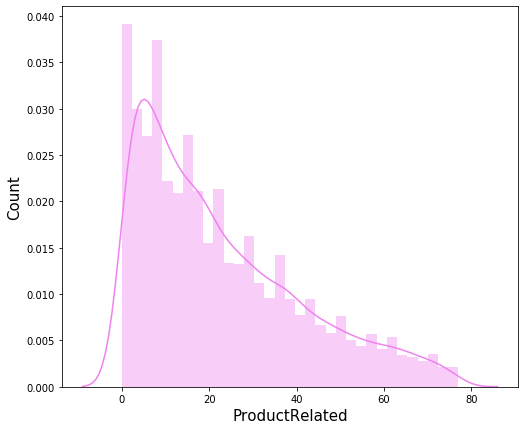

In [46]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['ProductRelated_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('ProductRelated Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ProductRelated'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

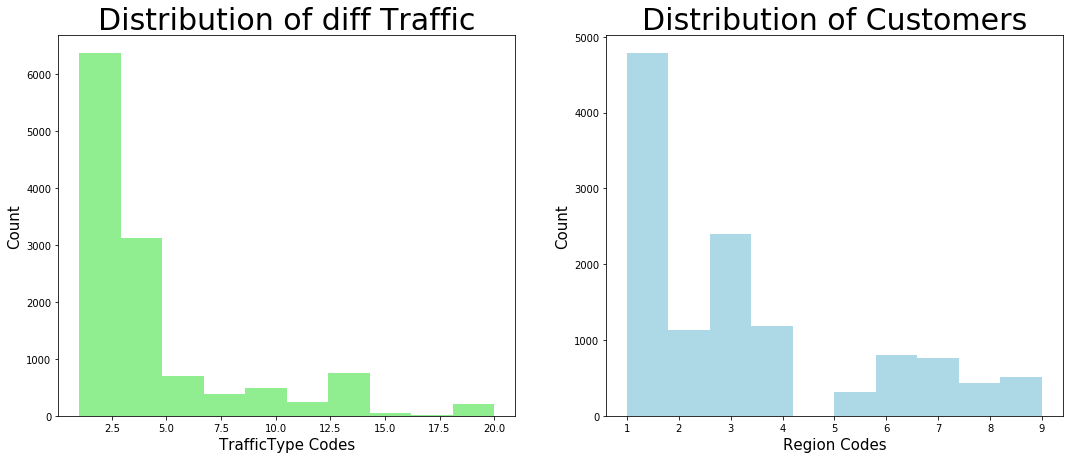

In [47]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(odf['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(odf['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

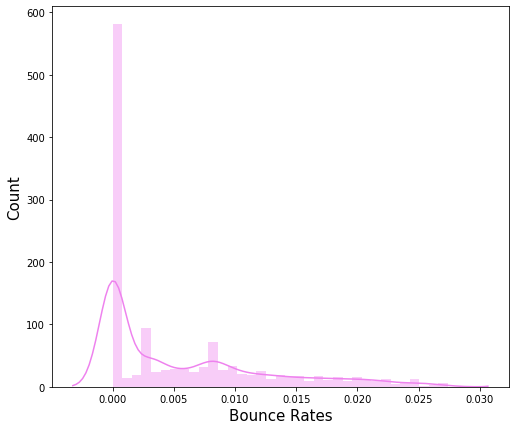

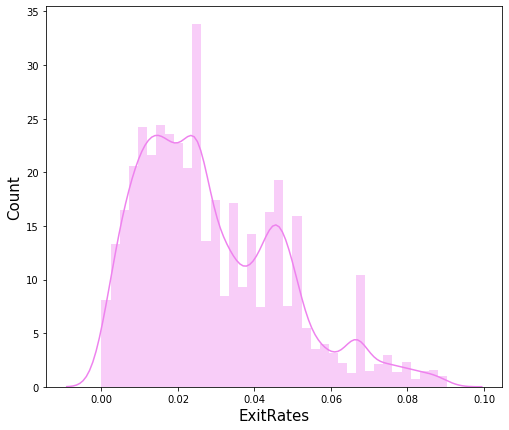

In [48]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['BounceRates'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ExitRates'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

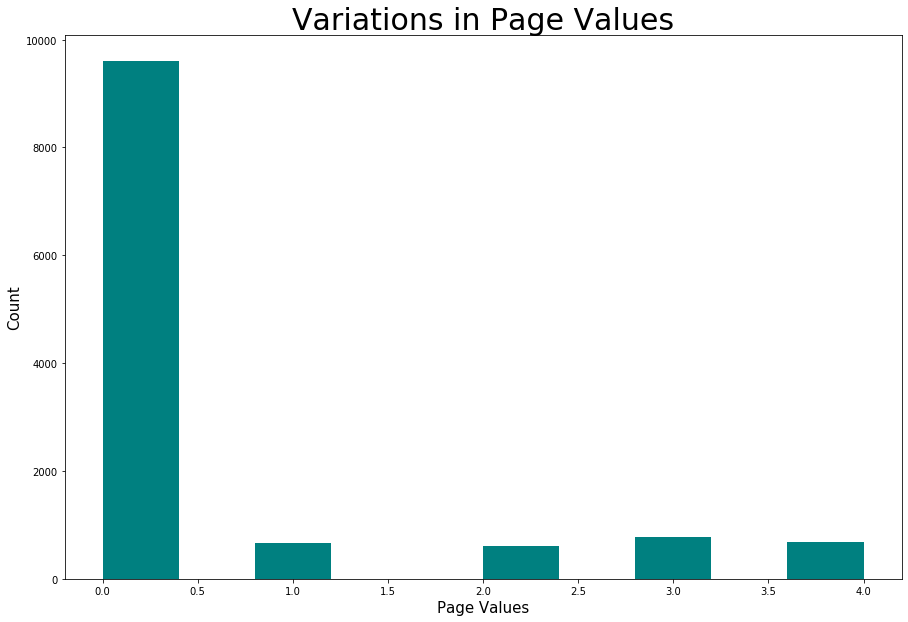

In [49]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(odf['PageValues'], color = 'teal')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

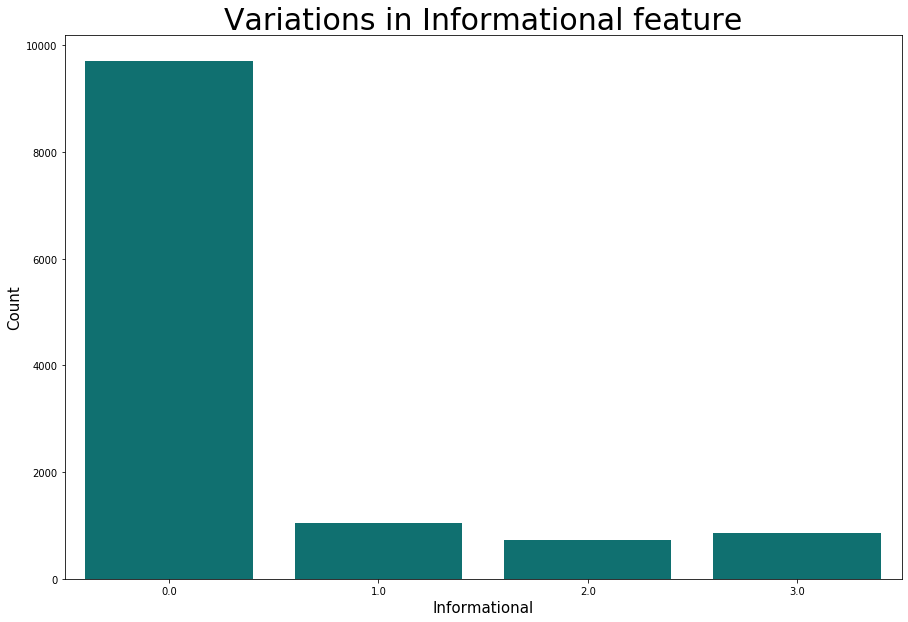

In [50]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(odf['Informational'], color = 'teal')
plt.title('Variations in Informational feature', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Bivariate Analysis

NameError: name 'y' is not defined

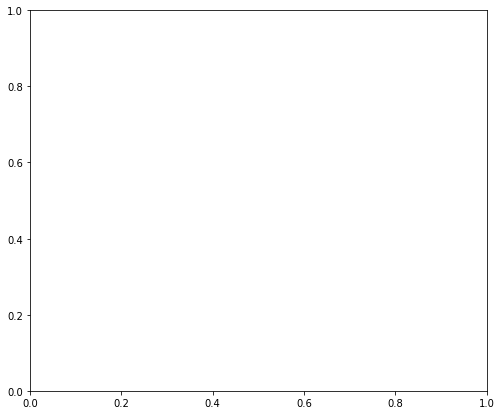

In [51]:
# exit rate vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(odf['Revenue'], odf['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
p.subplot(1, 2, 2)
sns.stripplot(y, X['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Month_encoded'],y=odf['Revenue_encoded'])
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(x=odf['SpecialDay'],y=odf['Revenue_encoded'])
plt.show()

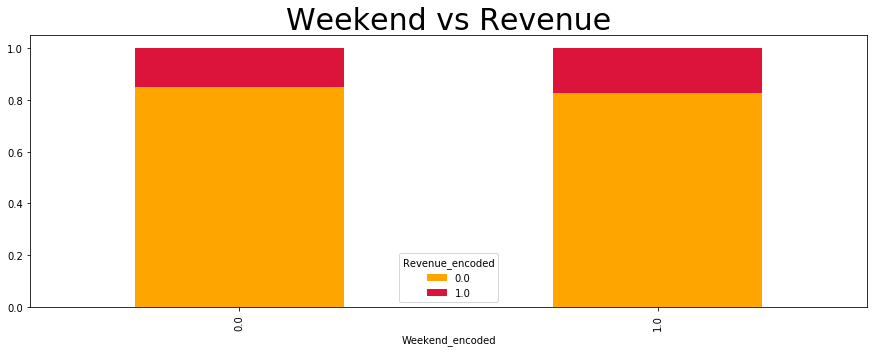

In [52]:
# weekend vs Revenue

df = pd.crosstab(odf['Weekend_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

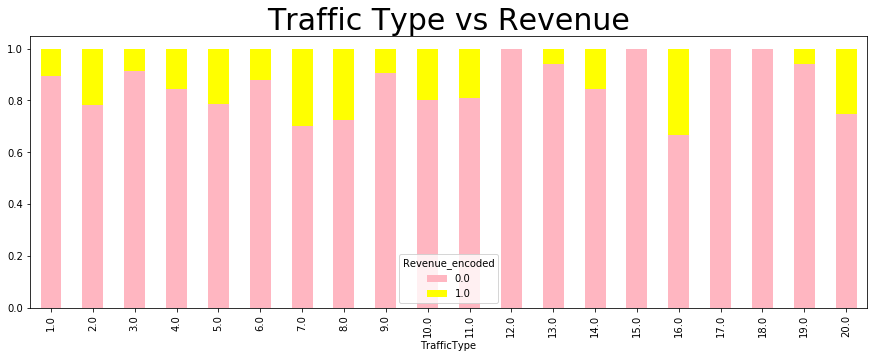

In [53]:
# Traffic Type vs Revenue

df = pd.crosstab(odf['TrafficType'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

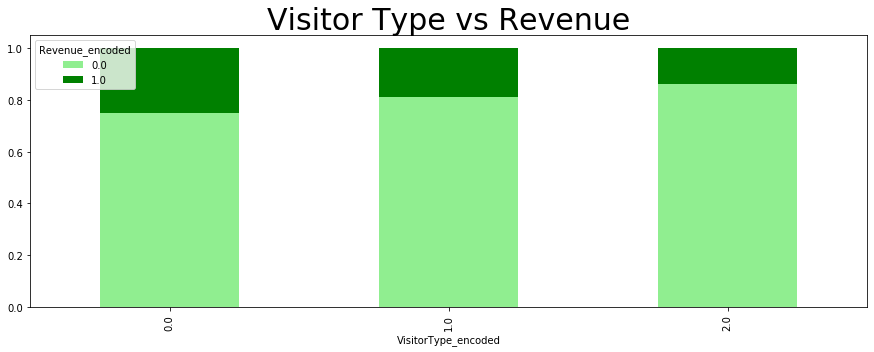

In [54]:
# visitor type vs revenue

df = pd.crosstab(odf['VisitorType_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


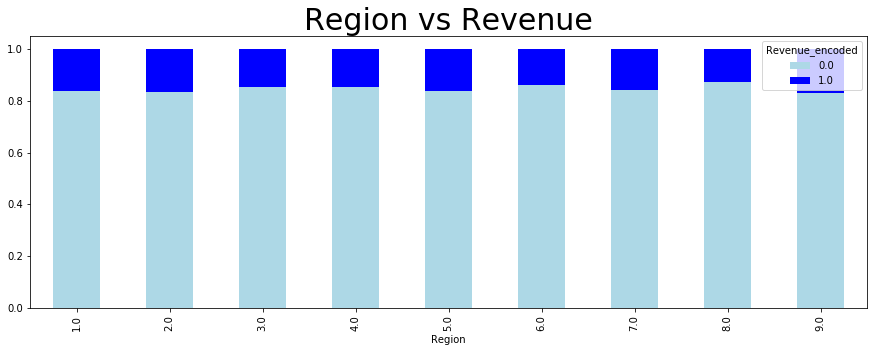

In [55]:
# region vs Revenue

df = pd.crosstab(odf['Region'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

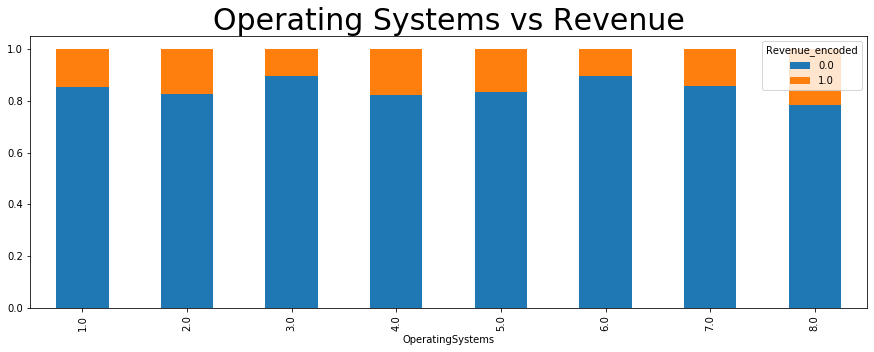

In [56]:
# region vs Revenue

df = pd.crosstab(odf['OperatingSystems'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Operating Systems vs Revenue', fontsize = 30)
plt.show()

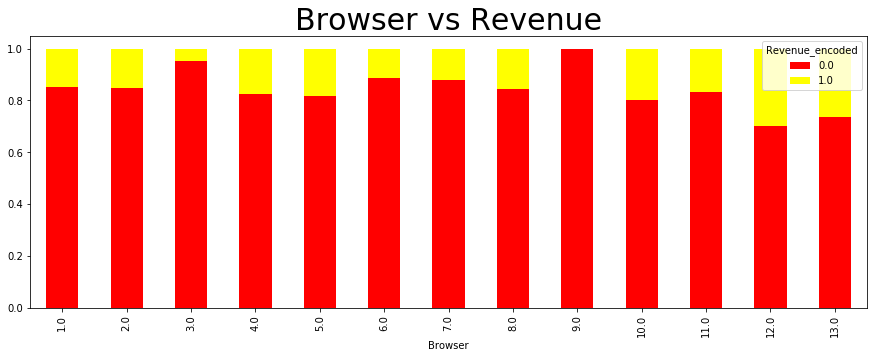

In [57]:
# region vs Revenue

df = pd.crosstab(odf['Browser'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['red', 'yellow'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

NameError: name 'y' is not defined

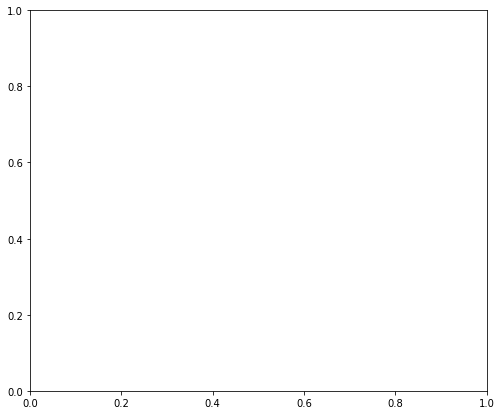

In [58]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(odf['Revenue'], odf['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(y, X['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)



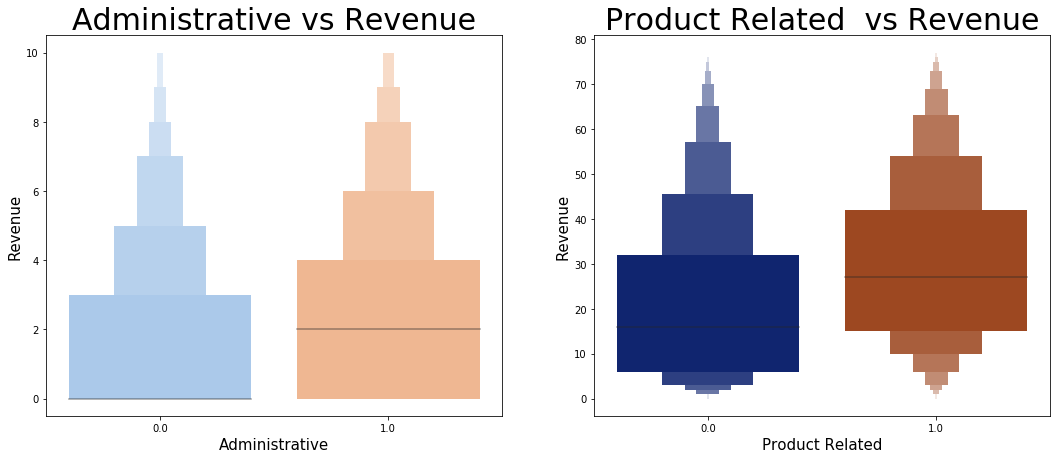

In [59]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(odf['Revenue_encoded'], odf['Administrative'], palette = 'pastel')
plt.title('Administrative vs Revenue', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(odf['Revenue_encoded'], odf['ProductRelated'], palette = 'dark')
plt.title('Product Related  vs Revenue', fontsize = 30)
plt.xlabel('Product Related', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

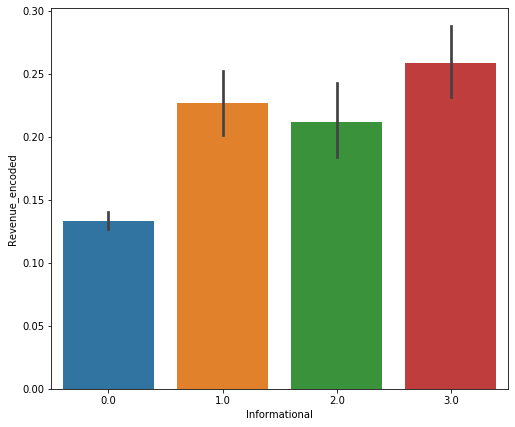

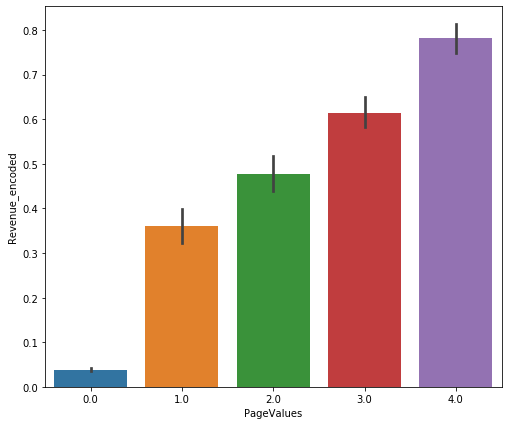

In [60]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Informational'],y=odf['Revenue_encoded'])
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(x=odf['PageValues'],y=odf['Revenue_encoded'])
plt.show()

### Transformation

In [61]:
#df1 = odf.copy()
#df_final1 = df1.transform(lambda X: np.log(X))

In [62]:
df2 = odf.copy()
final_df = df2.transform(lambda x: x**0.5)

In [63]:
final_df.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded
0,0.0,0.0,0.0,1.000000,0.000000,0.089683,0.214845,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.414214,1.414214,0.0
1,0.0,0.0,0.0,1.414214,8.000000,0.000000,0.158576,0.0,0.0,1.414214,1.414214,1.000000,1.414214,0.0,1.414214,1.414214,0.0
2,0.0,0.0,0.0,1.000000,0.000000,0.094119,0.214489,0.0,0.0,2.000000,1.000000,3.000000,1.732051,0.0,1.414214,1.414214,0.0
3,0.0,0.0,0.0,1.414214,1.632993,0.092327,0.215106,0.0,0.0,1.732051,1.414214,1.414214,2.000000,0.0,1.414214,1.414214,0.0
4,0.0,0.0,0.0,3.162278,25.049950,0.141421,0.223607,0.0,0.0,1.732051,1.732051,1.000000,2.000000,0.0,1.414214,1.414214,1.0


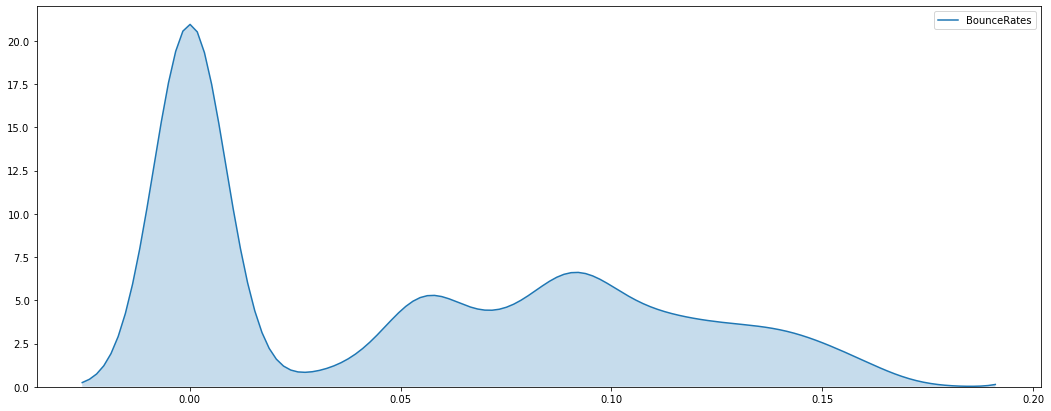

In [64]:
sns.kdeplot(final_df['BounceRates'],shade=True)
plt.show()

In [65]:
#sns.kdeplot(df_final1['BounceRates'],shade=True)
#plt.show()

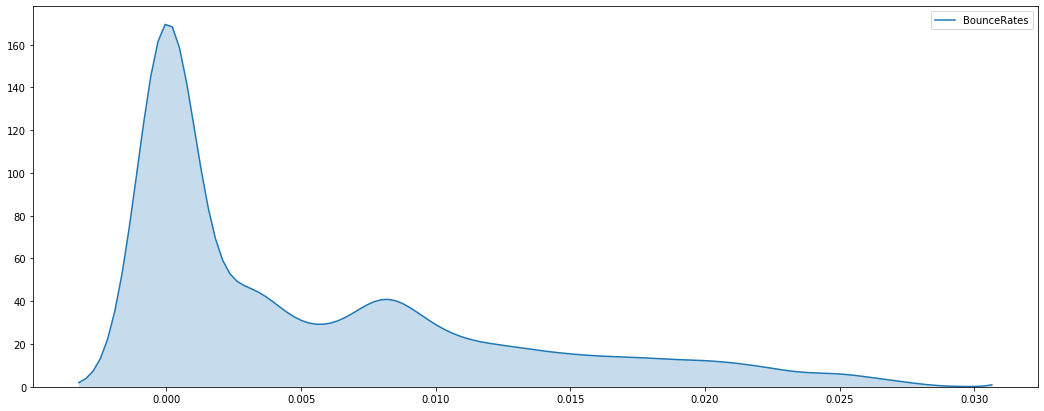

In [66]:
sns.kdeplot(odf['BounceRates'],shade=True)
plt.show()

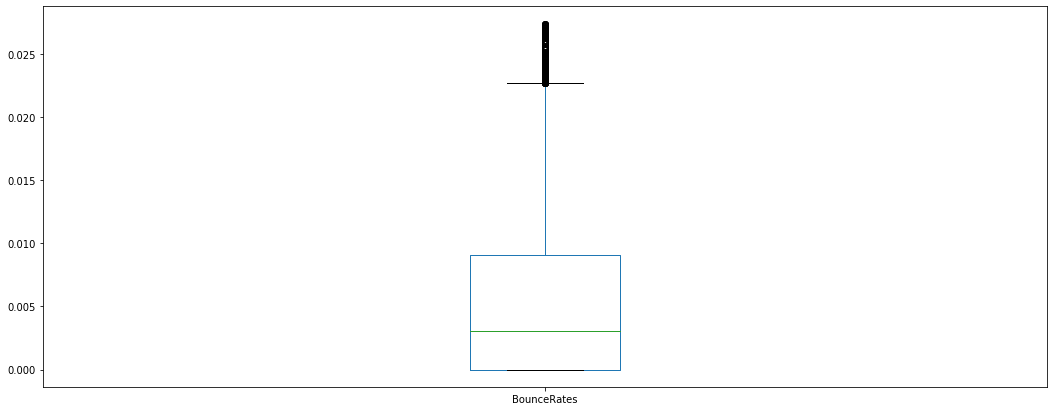

In [67]:
odf['BounceRates'].plot(kind='box')
plt.show()

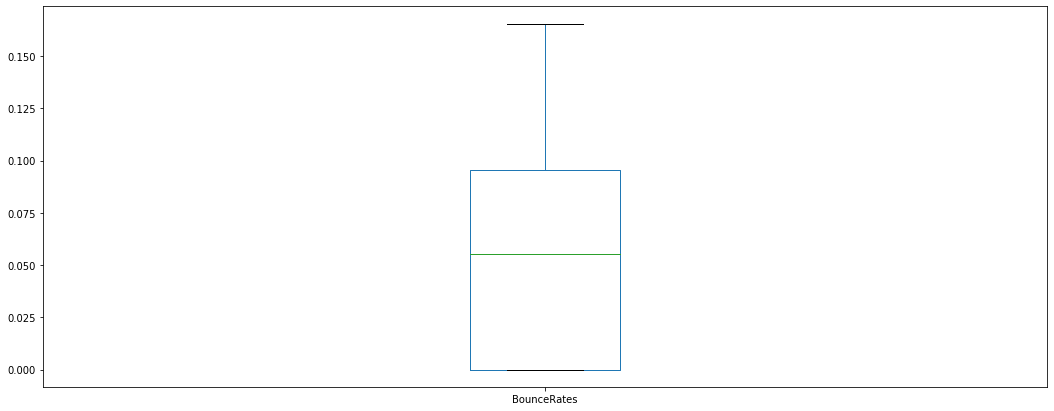

In [68]:
final_df['BounceRates'].plot(kind='box')
plt.show()

### Feature Selection

In [72]:
X=final_df.drop('Revenue_encoded',axis=1)
import statsmodels.api as sm
X_constant=sm.add_constant(X)

##### Backward elimination

In [74]:
import statsmodels.api as sm
x=final_df.drop('Revenue_encoded',axis=1)
y=final_df['Revenue_encoded']
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('Final set of variables are: ',selected_features_BE)

Final set of variables are:  ['Administrative_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_encoded', 'VisitorType_encoded']


In [75]:
b_feature=final_df[['Administrative_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_encoded', 'VisitorType_encoded']]
b_feature.head()

,Administrative_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_encoded,VisitorType_encoded
0,0.0,0.089683,0.214845,0.0,0.0,1.414214,1.414214
1,0.0,0.000000,0.158576,0.0,0.0,1.414214,1.414214
2,0.0,0.094119,0.214489,0.0,0.0,1.414214,1.414214
3,0.0,0.092327,0.215106,0.0,0.0,1.414214,1.414214
4,0.0,0.141421,0.223607,0.0,0.0,1.414214,1.414214


### Basic Model

In [132]:
#X=final_df.drop('Revenue_encoded',1)
X=final_df.drop(['Revenue_encoded'],axis=1)
y=final_df['Revenue_encoded']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=100)

#### Logistic Regression

In [133]:

################ logistic model: ##################

# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [145]:
score

0.889294403892944

In [146]:
logreg.score(X_train,y_train)

0.8929440389294404

### Decision Tree

In [152]:

######### Decision Tree Classifier:

#Training Model
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [153]:
print('accuracy score training data :-',dt_default.score(X_test,y_test))

accuracy score training data :- 0.8596918085969181


In [154]:
print('accuracy score training data :-',dt_default.score(X_train,y_train))

accuracy score training data :- 1.0


### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_pred = rf.predict(X_test)

score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [89]:
score

0.8925385239253852

In [90]:
rf.score(X_train,y_train)

1.0

#### Bagging

#### LR Bagging

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import sklearn

In [96]:
bagging_lr=sklearn.ensemble.BaggingClassifier(base_estimator=logreg)

In [103]:
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None,

In [104]:
bagging_lr.score(X_train,y_train)

0.893653690186537

In [110]:
bagging_lr.score(X_test,y_test)

0.8844282238442822

In [115]:
bagging_dt=sklearn.ensemble.BaggingClassifier(base_estimator=dt_default)

In [116]:
bagging_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [117]:
bagging_dt.score(X_train,y_train)

0.9912814274128142

In [118]:
bagging_dt.score(X_test,y_test)

0.8791565287915653

In [119]:
bagging_rf=sklearn.ensemble.BaggingClassifier(base_estimator=rf)

In [120]:
bagging_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [122]:
bagging_rf.score(X_train,y_train)

0.9787104622871047

In [123]:
bagging_rf.score(X_test,y_test)

0.8953771289537713

# models on features selected

In [128]:
#X=final_df.drop('Revenue_encoded',1)
X1=b_feature
y1=final_df['Revenue_encoded']

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=100)

#### Logistic Regression

In [131]:

################ logistic model: ##################

# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X1_train,y1_train)
y_pred = logreg.predict(X1_test)

print('accuracy score on train data',logreg.score(X1_train,y1_train))
print('accuracy score on train data',logreg.score(X1_test,y1_test))

accuracy score on train data 0.8944647201946472
accuracy score on train data 0.8896999188969992


#### DT

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X1_train,y1_train)

print('accuracy score training data :-',dt_default.score(X1_test,y1_test))
print('accuracy score training data :-',dt_default.score(X1_train,y1_train))

accuracy score training data :- 0.8572587185725872
accuracy score training data :- 0.9983779399837794


#### RF

In [156]:
rf=RandomForestClassifier()
rf.fit(X1_train,y1_train)

print('accuracy score training data :-',rf.score(X1_test,y1_test))
print('accuracy score training data :-',rf.score(X1_train,y1_train))

accuracy score training data :- 0.8868613138686131
accuracy score training data :- 0.9983779399837794


In [158]:
bagging_lr=sklearn.ensemble.BaggingClassifier(base_estimator=logreg)
bagging_lr.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_lr.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_lr.score(X1_train,y1_train))

accuracy score training data :- 0.8901054339010543
accuracy score training data :- 0.8948702351987023


In [ ]:
bagging_rf=sklearn.ensemble.BaggingClassifier(base_estimator=rf)
bagging_rf.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_rf.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_rf.score(X1_train,y1_train))

In [161]:
bagging_rf=sklearn.ensemble.BaggingClassifier(base_estimator=rf)
bagging_rf.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_rf.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_rf.score(X1_train,y1_train))

accuracy score training data :- 0.8909164639091647
accuracy score training data :- 0.9747566909975669
